<h1 align ="center"> REST API Mutiple Image Samples</h1>
<hr>
   
# Chat Completions

In [3]:
import base64
from IPython.display import Image, display
%run shared_functions.ipynb

Reference image:


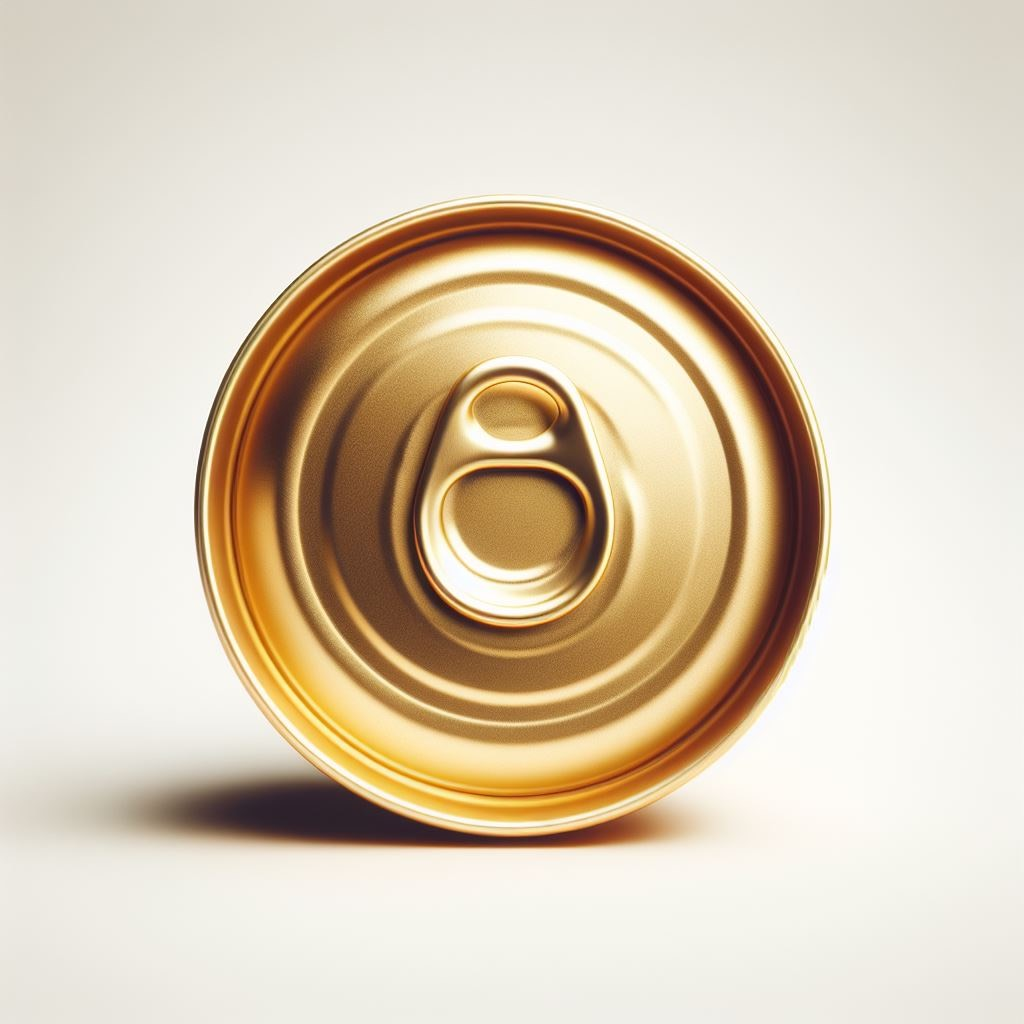

Test image:


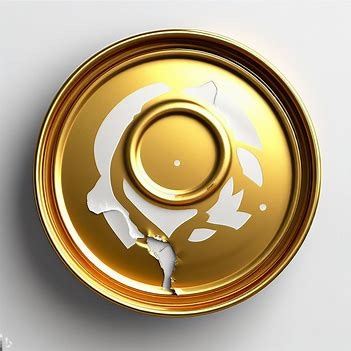

Defect detected.

The test image shows a can lid with several irregularities when compared to the reference image. The most noticeable defect is the peeling or chipping of the material around the center of the lid, which exposes a different layer or substrate beneath the gold-colored surface. These defects could be indicative of poor material quality, improper application of the surface coating, or damage from handling or use. The reference image shows a smooth, uniform surface with no such imperfections, indicating that the test image's condition does not meet the standard set by the reference.


In [5]:
#Defect Detector
reference_image_file_path = "../../common/images/DefectDetectorReference.jpg" 
with open(reference_image_file_path, 'rb') as image_file:
    encoded_reference_image = base64.b64encode(image_file.read()).decode('utf-8')

test_image_file_path = "../../common/images/DefectDetectorTest.jpg"
with open(test_image_file_path, 'rb') as image_file:
    encoded_test_image = base64.b64encode(image_file.read()).decode('utf-8')

sys_message = """
You're a professional defect detector.
Your job is to compare the test image with reference image, please answer the question with "No defect detected" or "Defect detected", 
also explain your decision as detail as possible."
"""

messages = [
    {
      "role": "system",
      "content": [
          {
            "type": "text", 
            "text": sys_message
          }
      ]
    },
    {
      "role": "user",
      "content": [
          {
            "type": "text",
            "text": "Here is the reference image", # Pass the prompt
          },
          {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_reference_image}" #Pass the encoded reference image
            }
          },
          {
            "type": "text",
            "text": "Here is the test image", # Pass the prompt
          },
          {
            "type": "image_url",
            "image_url": {
                "url": f"data:image/jpeg;base64,{encoded_test_image}" #Pass the encoded test image
            }
          }
      ]
    }    
  ]

try:
    response_content = call_GPT4V_image(messages)
    print("Reference image:")
    display(Image(reference_image_file_path))
    print("Test image:")
    display(Image(test_image_file_path))
    print(response_content['choices'][0]['message']['content'])  # Print the content of the response
except Exception as e:
    raise SystemExit(f"Failed to call GPT-4V API. Error: {e}")